In [1]:
# Built-in 데이터셋 로드 함수
from sklearn.datasets import load_digits, load_wine, load_breast_cancer
# train, test 데이터셋 분류
from sklearn.model_selection import train_test_split
# 결과 출력
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Toy 데이터셋 분석
* [load_digits: MNIST 손글씨 데이터](#1.-MNIST-데이터셋-분석)
* [load_wine: 와인 데이터](#2.-Wine-데이터셋-분석)
* [load_breast_cancer: 위스콘신 유방암 환자 데이터](#3.-Cancer-데이터셋-분석)

---

### 0. 데이터 로드 및 확인

In [2]:
# digits
mnist = load_digits()
# wine
wine = load_wine()
# cancer
b_cancer = load_breast_cancer()

* dir(): 객체가 어떤 변수와 메서드를 가지고 있는지 나열

In [3]:
print(dir(mnist))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


빌트인 데이터셋은 sklearn.utils.Bunch 라는 자료구조를 활용함

key-value 형식으로 구성 -> 사전(dict)형 타입과 유사 

공통 key

* data: 샘플 데이터, Numpy 배열로 이루어져 있습니다.
* target: Label 데이터, Numpy 배열로 이루어져 있습니다.
* feature_names: Feature 데이터의 이름
* target_names: Label 데이터의 이름
* DESCR: 데이터 셋의 설명
* filename: 데이터 셋의 파일 저장 위치 (csv)

---

### 1. MNIST 데이터셋 분석

In [4]:
# 1) 데이터 준비
mnist = load_digits()

* Feature Data 지정하기
* Label Data 지정하기
* Target Names 출력해 보기
* 데이터 Describe 해 보기


In [5]:
dir(mnist)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
mnist.data.shape

(1797, 64)

In [7]:
# 0~16까지 음영도 나타냄
mnist.data.max(), mnist.data.min()

(16.0, 0.0)

In [8]:
mnist.target.shape

(1797,)

In [9]:
#8X8 픽셀값 포함
mnist.feature_names 

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [10]:
# Y값 0~9
np.unique(mnist.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

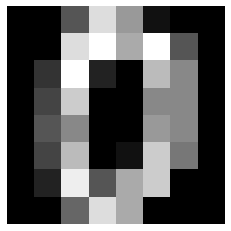

In [11]:
# 2) 이미지 데이터 확인
%matplotlib inline 

plt.imshow(mnist.data[0].reshape(8, 8), cmap='gray') # 2차원 구성
plt.axis('off')
plt.show()

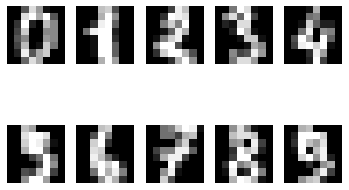

In [12]:
# 3) 여러개 이미지 데이터 확인
for i in range(10):
    plt.subplot(2, 5, i+1) # 10개의 이미지를 2행 5열로 표시
    plt.imshow(mnist.data[i].reshape(8, 8), cmap='gray') 
    # plt.imshow()는 (m,n) 형태의 데이터를 입력으로 받기 때문에
    # 데이터셋 내의 1열로 펼쳐진 64개의 데이터를 원래의 이미지 형태인 (8,8)로 복원
    # cmap은 해당 이미지의 색상을 지정(gray는 흑백으로 출력)
    plt.axis('off') # 축을 보이지 않게 해줍니다. 
plt.show()

In [13]:
mnist_label = mnist.target # 각 이미지 라벨값 저장

print(mnist_label.shape)
mnist_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
# train, test X, Y 분배
X_train, X_test, y_train, y_test = train_test_split(mnist.data, 
                                                    mnist_label, 
                                                    test_size=0.2, # 8:2 = train:test
                                                    random_state=7)


X_train.shape, y_train.shape
# train의 형상정보 확인

((1437, 64), (1437,))

### 0~9 분류 모델 생성 

#### Decision Tree 

In [15]:
from sklearn.tree import DecisionTreeClassifier 

decision_tree = DecisionTreeClassifier(random_state=32) 

print(decision_tree._estimator_type)

decision_tree.fit(X_train, y_train) # 훈련
y_pred = decision_tree.predict(X_test) # 예측

# 실제 정답 y_test과 예측값 y_pred 비교하여 정확도 측정하기
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

print(classification_report(y_test, y_pred)) # 결과 지표 확인

classifier
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



- 틀린 데이터셋 확인하기

In [16]:
# 예측값을 서로 빼서 0값 제외 인덱스 찾기
ans = y_test - y_pred
np.count_nonzero(ans)

52

In [17]:
X_test[np.nonzero(ans)][0]

array([ 0.,  0.,  3.,  4., 10.,  0.,  0.,  0.,  0.,  3., 15.,  8., 14.,
        3.,  0.,  0.,  0.,  8.,  7.,  0., 10.,  6.,  0.,  0.,  0.,  3.,
       11.,  8., 15., 11.,  0.,  0.,  0.,  0.,  1.,  7.,  3., 13.,  3.,
        0.,  0.,  0.,  0.,  0.,  0.,  6.,  9.,  0.,  0.,  0.,  9.,  6.,
        1.,  0., 16.,  0.,  0.,  0.,  0.,  3., 11., 16., 16.,  3.])

In [18]:
# 시각화
def show_ans(ans, X_test, y_pred, nrows, ncols, figsize):
    _, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize= figsize)
    for ax, image, prediction in zip(axes, X_test[np.nonzero(ans)], y_pred[np.nonzero(ans)]):
        ax.set_axis_off()
        image = image.reshape(8, 8)
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest") # 보간
        ax.set_title(f"Prediction: {prediction}")

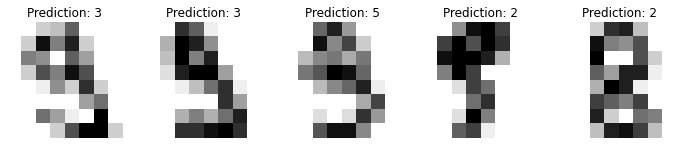

In [19]:
# 충격적인 결과..!
show_ans(ans, X_test, y_pred, 1, 5, (12, 6))

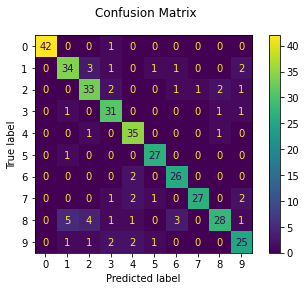

In [20]:
from sklearn import metrics

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
#print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

#### RandomForest

In [21]:
from sklearn.ensemble import RandomForestClassifier 

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train) # 훈련
y_pred = random_forest.predict(X_test) # 예측

print(classification_report(y_test, y_pred)) # 결과 지표 확인

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



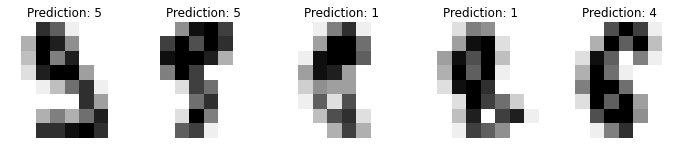

In [22]:
ans = y_pred - y_test
show_ans(ans, X_test, y_pred, 1, 5, (12, 6))

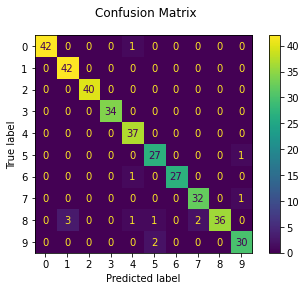

In [23]:
from sklearn import metrics

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
#print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [24]:
from sklearn import svm #Support Vector Machine을 사용하기 위해 import
svm_model = svm.SVC(random_state = 32) # 모델 객체를 만든다.

print(svm_model._estimator_type) # 모델 타입 확인

svm_model.fit(X_train, y_train) # 훈련

y_pred = svm_model.predict(X_test) # 예측

print(classification_report(y_test, y_pred)) # 결과 지표 확인

classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



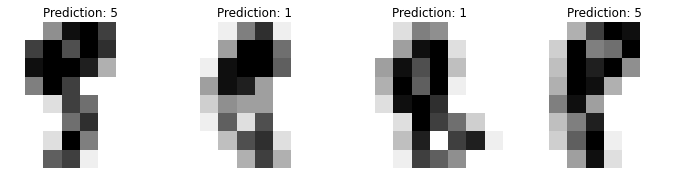

In [25]:
ans = y_pred - y_test
show_ans(ans, X_test, y_pred, 1, 4, (12, 6))

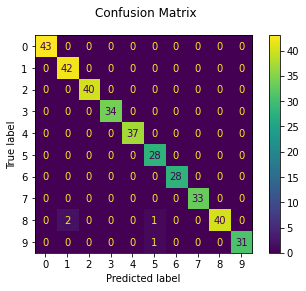

In [26]:
from sklearn import metrics

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
#print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [27]:
from sklearn.linear_model import SGDClassifier #선형분류기인 SGDClassifier를 사용하기 위한 import
sgd_model = SGDClassifier(random_state = 32) # 모델 객체 생성

print(sgd_model._estimator_type) # 모델 타입 확인

sgd_model.fit(X_train, y_train)

y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred)) # 결과 지표를 확인

classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.85      0.95      0.90        42
           2       0.98      1.00      0.99        40
           3       0.89      0.94      0.91        34
           4       1.00      0.97      0.99        37
           5       0.93      1.00      0.97        28
           6       0.96      0.93      0.95        28
           7       0.97      0.97      0.97        33
           8       0.88      0.88      0.88        43
           9       0.96      0.72      0.82        32

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



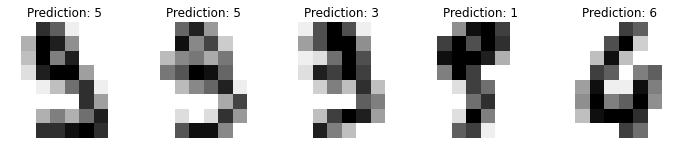

In [28]:
ans = y_pred - y_test
show_ans(ans, X_test, y_pred, 1, 5, (12, 6))

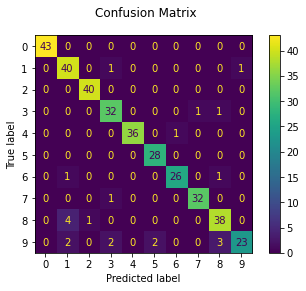

In [29]:
from sklearn import metrics

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
#print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [30]:
from sklearn.linear_model import LogisticRegression # 선형분류기인 LogisticRegression를 사용하기 위한 import
logistic_model = LogisticRegression(max_iter = 5000, random_state = 32) # 모델 객체 생성, max_iter 설정

print(logistic_model._estimator_type) # 모델 타입 확인

logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       1.00      1.00      1.00        37
           5       0.79      0.96      0.87        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       0.92      0.81      0.86        43
           9       0.97      0.88      0.92        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



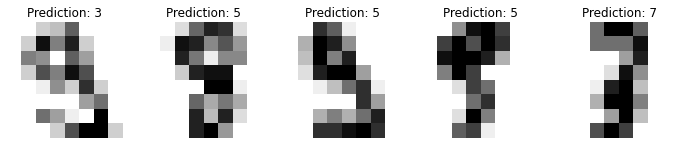

In [31]:
ans = y_pred - y_test
show_ans(ans, X_test, y_pred, 1, 5, (12, 6))

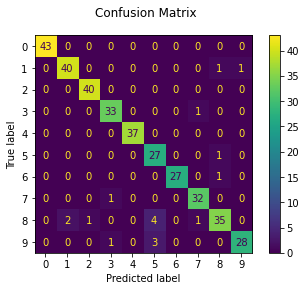

In [32]:
from sklearn import metrics

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
#print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

## 단순 분석 결과 

#### SVM > RF > LR > SGD > DT 순으로 정확도가 높음

## 2. Wine 데이터셋 분석

In [33]:
# 1) 필요한 모듈 import
# from sklearn.datasets import load_wine
# from sklearn.model_selection import train_test_split 
# from sklearn.tree import DecisionTreeClassifier 
# from sklearn.metrics import classification_report
# from sklearn.metrics import accuracy_score

# 2) 데이터 준비
wine = load_wine()
wine_data = pd.DataFrame(wine.data)
wine_data.columns = wine.feature_names
wine_label = wine.target

print(wine_data.shape, wine_label.shape) 
# 3) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=7) 
print('train, test: ', X_train.shape, X_test.shape)

(178, 13) (178,)
train, test:  (142, 13) (36, 13)


In [34]:
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


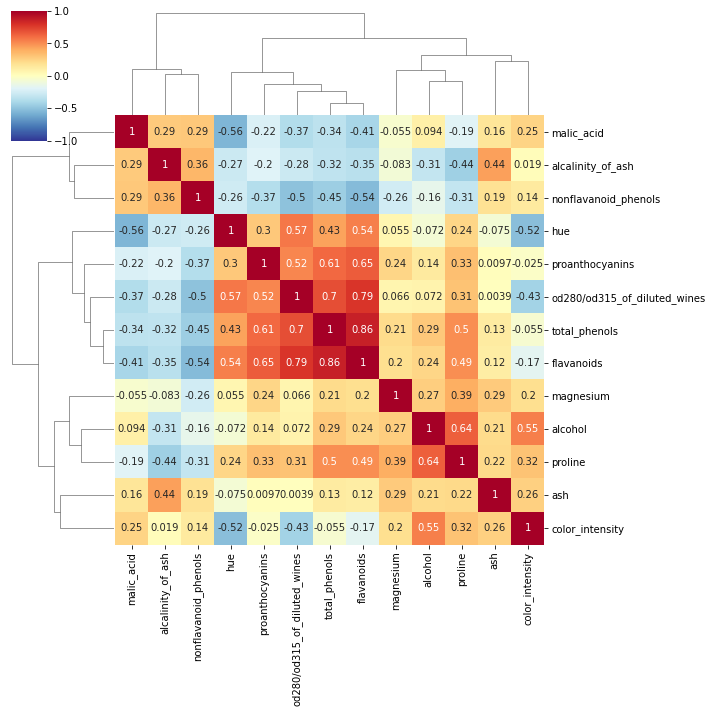

In [35]:
import seaborn as sns
cor_wine = wine_data.corr()
sns.clustermap(cor_wine, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

#### 타겟값 확인

In [36]:
np.unique(wine_label)

array([0, 1, 2])

In [37]:
# 4) 모델 학습 및 예측 - Decision Tree
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train) # 훈련
y_pred = decision_tree.predict(X_test) # 예측

print(classification_report(y_test, y_pred)) # 결과 지표 확인

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



In [38]:
# 4) 모델 학습 및 예측 - Random Forests
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train) # 훈련
y_pred = random_forest.predict(X_test) # 예측

print(classification_report(y_test, y_pred)) # 결과 지표 확인

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [39]:
# 4) 모델 학습 및 예측 - SVM
svm_model = svm.SVC(random_state = 32) # 모델 객체 생성
svm_model.fit(X_train, y_train) # 훈련
y_pred = svm_model.predict(X_test) # 예측

print(classification_report(y_test, y_pred)) # 결과 지표 확인

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58      0.88      0.70        17
           2       0.33      0.08      0.13        12

    accuracy                           0.61        36
   macro avg       0.59      0.61      0.56        36
weighted avg       0.55      0.61      0.54        36



In [40]:
# 4) 모델 학습 및 예측 - SGD Classifier - zero division 발생
sgd_model = SGDClassifier() # 모델 객체 생성
sgd_model.fit(X_train, y_train) # 훈련
y_pred = sgd_model.predict(X_test) # 예측

print(classification_report(y_test, y_pred)) # 결과 지표 확인

              precision    recall  f1-score   support

           0       0.54      1.00      0.70         7
           1       0.65      0.88      0.75        17
           2       0.00      0.00      0.00        12

    accuracy                           0.61        36
   macro avg       0.40      0.63      0.48        36
weighted avg       0.41      0.61      0.49        36



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
sgd_model.fit(X_train, y_train) # 훈련
y_pred = sgd_model.predict(X_test) # 예측

print(classification_report(y_test, y_pred, zero_division = 0)) # 결과 지표 확인

              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.52      1.00      0.68        17
           2       0.00      0.00      0.00        12

    accuracy                           0.56        36
   macro avg       0.51      0.48      0.43        36
weighted avg       0.44      0.56      0.44        36



/opt/conda/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


#### zero division: 0으로 나눠질 경우 발생, f1 score의 경우 TF값이 0일 때, 

- F1 = 2 * (precision * recall) / (precision + recall)
- precsion, recall값이 0일 경우 발생함
- 에러를 피하기 위해 zero_division = 0 설정

In [177]:
# 4) 모델 학습 및 예측 - Logistic 회귀
logistic_model = LogisticRegression(max_iter = 5000, random_state = 32) # 모델 객체 생성, max_iter 설정
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.94      1.00      0.97        17
           2       1.00      0.92      0.96        12

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



## 3. Cancer 데이터셋 분석 

In [178]:
# 1) 필요한 모듈 import
# from sklearn.datasets import load_breast_cancer
# from sklearn.model_selection import train_test_split 
# from sklearn.tree import DecisionTreeClassifier 
# from sklearn.metrics import classification_report
# from sklearn.metrics import accuracy_score

# 2) 데이터 준비
cancer = load_breast_cancer()
cancer_data = cancer.data
cancer_label = cancer.target

# 3) train, test 데이터 분리
#train_test_split()를 사용하여 X값, y값을 각각 train data와 test data로 나눈다. 함수에 들어 갈 파라미터로는 x,y가 들어가고
#test_size는 몇대몇으로 나눌지 정하는 옵션, random_state는 랜덤 패턴의 값을 지정한다. (어떤 값을 넣어도 무방하다.)
X_train, X_test, y_train, y_test = train_test_split(cancer_data, 
                                                    cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=7) 

In [179]:
pd.DataFrame(cancer.data).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [180]:
# 4) 모델 학습 및 예측 - Decision Tree
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train) # 훈련
y_pred = decision_tree.predict(X_test) # 예측

print(classification_report(y_test, y_pred)) # 결과 지표 확인

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



In [181]:
# 4) 모델 학습 및 예측 - Random Forests
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train) # 훈련
y_pred = random_forest.predict(X_test) # 예측

print(classification_report(y_test, y_pred)) # 결과 지표 확인

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



In [182]:
# 4) 모델 학습 및 예측 - SVM
svm_model = svm.SVC(random_state=32) # 모델 객체 생성
svm_model.fit(X_train, y_train) # 훈련
y_pred = svm_model.predict(X_test) # 예측

print(classification_report(y_test, y_pred)) # 결과 지표 확인

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114



In [183]:
# 4) 모델 학습 및 예측 - SGD Classifier - zero division 발생
sgd_model = SGDClassifier(random_state=32) # 모델 객체 생성
sgd_model.fit(X_train, y_train) # 훈련
y_pred = sgd_model.predict(X_test) # 예측

print(classification_report(y_test, y_pred)) # 결과 지표 확인

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        40
           1       0.86      1.00      0.92        74

    accuracy                           0.89       114
   macro avg       0.93      0.85      0.87       114
weighted avg       0.91      0.89      0.89       114



In [184]:
# 4) 모델 학습 및 예측 - Logistic 회귀
logistic_model = LogisticRegression(max_iter = 5000,random_state=32) # 모델 객체 생성, max_iter 설정
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        40
           1       0.93      1.00      0.96        74

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



### 회고

- sklearn을 너무 오랜만에 다뤄서 다시 봐야할게 많았다..
- SGDClassifier에서만 zero_division이 발생하는 이유를 추가적으로 살펴봐야할 것 같다(경고문구 제거 방법도).
- 데이터셋 전처리 후 예측을 진행한다면 정확도를 향상시킬 수 있을 것 같다.

![nn](./assets/goal.jpeg)